In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
import datetime
import folium #Longitude and Lattitude mapping.


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
from itertools import *
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster #To be able to cluster our individual data points on folium.
from IPython.display import HTML, display

In [2]:
calendar = pd.read_csv('singapore_calendar.csv')
detail_listing = pd.read_csv('singapore_listings.csv') #detailed listings
detail_reviews = pd.read_csv('singapore_reviews.csv') #detailed reviews


In [3]:
detail_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20201026165207,2020-10-26,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,10.0,8.0,8.0,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20201026165207,2020-10-26,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.23
2,56334,https://www.airbnb.com/rooms/56334,20201026165207,2020-10-26,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.18
3,71609,https://www.airbnb.com/rooms/71609,20201026165207,2020-10-26,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,10.0,9.0,9.0,NaN,t,8,0,8,0,0.19
4,71896,https://www.airbnb.com/rooms/71896,20201026165207,2020-10-26,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,9.0,8.0,8.0,NaN,t,8,0,8,0,0.21


In [4]:
detail_listing.shape

(4492, 74)

In [5]:
detail_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


In [6]:
detail_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61542 entries, 0 to 61541
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     61542 non-null  int64 
 1   id             61542 non-null  int64 
 2   date           61542 non-null  object
 3   reviewer_id    61542 non-null  int64 
 4   reviewer_name  61542 non-null  object
 5   comments       61445 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


In [7]:
detail_reviews['reviewer_id'].value_counts()#.loc[lambda x : x>10]

111690171    22
104026993    20
3289968      19
115427441    18
125890456    15
             ..
230443811     1
162677538     1
112486663     1
46119709      1
172278136     1
Name: reviewer_id, Length: 56718, dtype: int64

In [8]:
detail_reviews.groupby('listing_id')['reviewer_id'].value_counts().loc[lambda x : x>5].sort_values(ascending=False)

listing_id  reviewer_id
39618567    111690171      19
3802621     3289968        14
8180346     55688569       12
31532719    104026993      10
42079535    350742662       9
8508225     3299335         9
42377979    355627049       8
19580455    97681492        8
42417293    369335503       6
8156821     4942570         6
5494971     8145165         6
1678744     268902696       6
1647014     4942570         6
Name: reviewer_id, dtype: int64

In [9]:
detail_reviews.loc[detail_reviews['reviewer_id'] == 24779930].sort_values(by=['date'])

,listing_id,id,date,reviewer_id,reviewer_name,comments


The same reviewer has left 20 feedback to the same listing! Let's look at one more.. 



In [10]:
detail_reviews.loc[detail_reviews['reviewer_id'] == 5750451].sort_values(by=['date'])

,listing_id,id,date,reviewer_id,reviewer_name,comments


In [11]:
#calendar.info()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1838622,2020-10-26,t,$90.00,$90.00,2,1125
1,1838622,2020-10-27,t,$90.00,$90.00,2,1125
2,1838622,2020-10-28,t,$90.00,$90.00,2,1125
3,1838622,2020-10-29,t,$90.00,$90.00,2,1125
4,1838622,2020-10-30,t,$108.00,$108.00,2,1125


In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639580 entries, 0 to 1639579
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1639580 non-null  int64 
 1   date            1639580 non-null  object
 2   available       1639580 non-null  object
 3   price           1639580 non-null  object
 4   adjusted_price  1639580 non-null  object
 5   minimum_nights  1639580 non-null  int64 
 6   maximum_nights  1639580 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 87.6+ MB


Let's clean some data on calendar dataset

In [13]:
calendar.shape

(1639580, 7)

In [14]:
calendar[calendar['price'] > calendar['adjusted_price']]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4177,4499317,2020-12-26,t,$128.00,$122.00,2,365
4178,4499317,2020-12-27,t,$128.00,$122.00,2,365
4179,4499317,2020-12-28,t,$128.00,$122.00,2,365
4180,4499317,2020-12-29,t,$128.00,$122.00,2,365
4181,4499317,2020-12-30,t,$128.00,$122.00,2,365
...,...,...,...,...,...,...,...
1516776,44382728,2020-10-28,t,"$2,280.00","$2,052.00",2,1125
1516777,44382728,2020-10-29,t,"$2,280.00","$2,052.00",2,1125
1516778,44382728,2020-10-30,t,"$2,680.00","$2,412.00",2,1125
1516779,44382728,2020-10-31,t,"$2,680.00","$2,412.00",2,1125


In [15]:
#convert date into date datatype
calendar['date'] = pd.to_datetime(calendar['date'])

#convert prices into numbers
calendar['price'] = pd.to_numeric(calendar['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

#convert available into boolean
d = {'t': True, 'f': False}
calendar['available'] = calendar['available'].map(d)

In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639580 entries, 0 to 1639579
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1639580 non-null  int64         
 1   date            1639580 non-null  datetime64[ns]
 2   available       1639580 non-null  bool          
 3   price           1639580 non-null  float64       
 4   adjusted_price  1639580 non-null  float64       
 5   minimum_nights  1639580 non-null  int64         
 6   maximum_nights  1639580 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3)
memory usage: 76.6 MB


In [17]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1639575,45892917,2021-10-21,True,130.0,130.0,28,1124
1639576,45892917,2021-10-22,True,130.0,130.0,28,1124
1639577,45892917,2021-10-23,True,130.0,130.0,28,1124
1639578,45892917,2021-10-24,True,130.0,130.0,28,1124
1639579,45892917,2021-10-25,True,130.0,130.0,28,1124


In [18]:
#filter calendar minimum_nights for less than 28 days > short term rental
calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size

3336

In [19]:
short_term = (calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size)/7226
short_term

0.46166620536949904

There are over 68% airbnb lisings in Hong Kong offer short term rentals that is 28 days or less. => possible illegal listing! 

How do we find out?! There is a list of licensed guest house in HK https://www.hadla.gov.hk/filemanager/en/docs/list_licensed_guesthouse_eng.pdf

However we dont have the address for airbnb dataset, perhaps do something with longitude/latitude? But then the government licsensed guesthouse have no longitude/latitude coordinates... 

Maybe save it for some other execuse when I have time...

In [20]:
calendar_test = calendar.groupby('listing_id')['date'].count().reset_index()
calendar_test

,listing_id,date
0,49091,365
1,50646,365
2,56334,365
3,71609,365
4,71896,365
...,...,...
4487,46058252,365
4488,46058293,365
4489,46058403,365
4490,46058588,365


In [21]:
calendar_test['date'].value_counts()

365    4492
Name: date, dtype: int64

There are 365 rows for each listing. 

In [22]:
#checking the available column... see how many non null
calendar_test = calendar.groupby('available')['price'].value_counts()
#calendar_test = calendar.groupby('available')['price'].count().reset_index()

calendar_test

available  price 
False      60.0      15305
           200.0      9649
           70.0       9563
           90.0       8872
           50.0       8555
                     ...  
True       634.0         1
           845.0         1
           871.0         1
           1342.0        1
           2880.0        1
Name: price, Length: 1133, dtype: int64

In [23]:
calendar['available'].value_counts()/calendar.shape[0]

True     0.785208
False    0.214792
Name: available, dtype: float64

70% of the listings are marked available. Either the other 30% are booked or owners have taken it off the market?

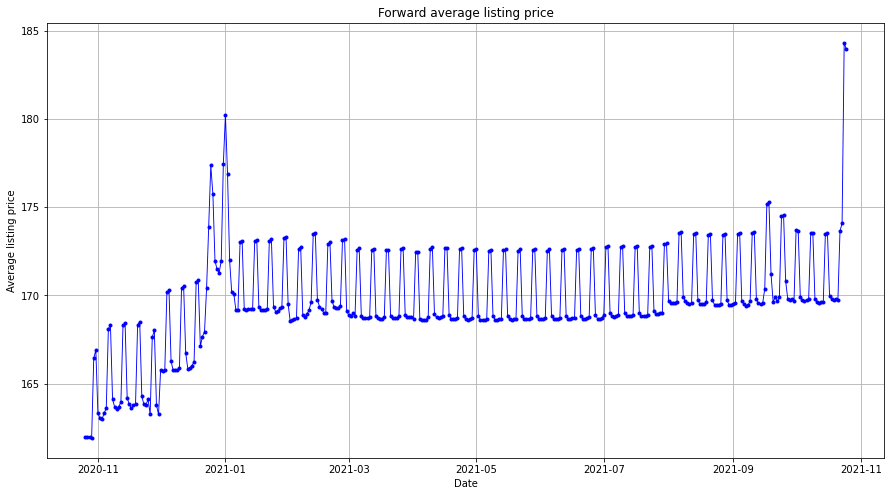

In [24]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()

#calendar_test_mean = calendar1[(calendar1['date'] > from_ts) & (calendar1['date'] < to_ts) & (calendar1['available'] == True)]
#calendar_test_mean = calendar1[(calendar1['available'] == True)]
calendar_test_mean = calendar1

# Taking average
calendar_test_mean = calendar_test_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_test_mean.date, calendar_test_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()

What happen if we exclude those that are unavailable? 

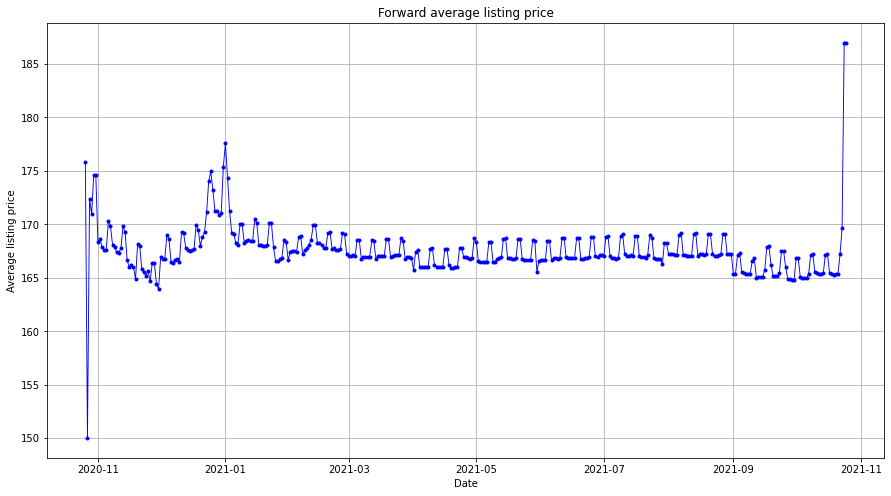

In [25]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()


calendar_test_mean = calendar1[(calendar1['available'] == True)]

# Taking average
calendar_test_mean = calendar_test_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_test_mean.date, calendar_test_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()

what happened if i plot those that are unavailable? 

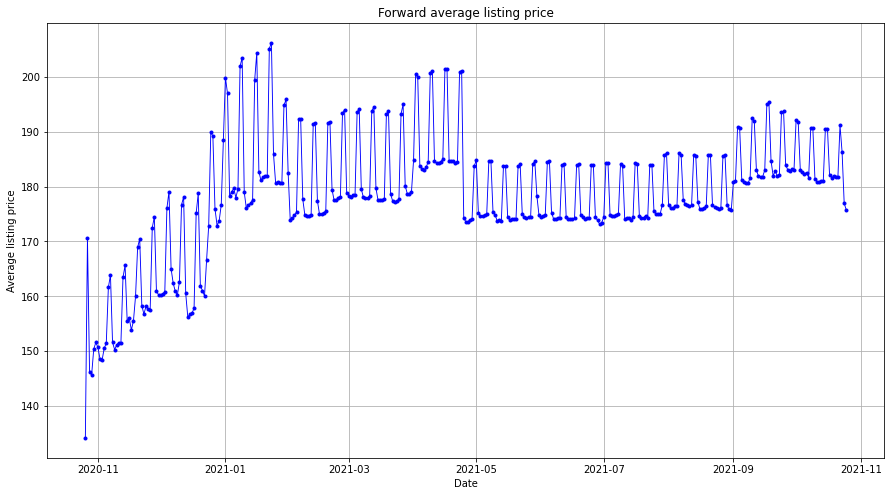

In [26]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()

calendar_test_mean = calendar1[(calendar1['available'] == False)]

# Taking average
calendar_test_mean = calendar_test_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_test_mean.date, calendar_test_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()


Let's take a look at the listing data.

In [27]:
detail_listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20201026165207,2020-10-26,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,10.0,8.0,8.0,NaN,f,2,0,2,0,0.01


How many airbnb listings in Hong Kong? 

In [28]:
detail_listing.shape

(4492, 74)

In [29]:
detail_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4492 non-null   int64  
 1   listing_url                                   4492 non-null   object 
 2   scrape_id                                     4492 non-null   int64  
 3   last_scraped                                  4492 non-null   object 
 4   name                                          4492 non-null   object 
 5   description                                   4329 non-null   object 
 6   neighborhood_overview                         2961 non-null   object 
 7   picture_url                                   4492 non-null   object 
 8   host_id                                       4492 non-null   int64  
 9   host_url                                      4492 non-null   o

In [30]:
filtered_listing = detail_listing[['property_type', 'room_type', 'accommodates', 'neighbourhood_cleansed', 'review_scores_value', 'number_of_reviews', 
                                   'bedrooms', 'price', 'longitude', 'latitude']].copy()
#convert prices into numbers
filtered_listing['price'] = pd.to_numeric(filtered_listing['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

filtered_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           4492 non-null   object 
 1   room_type               4492 non-null   object 
 2   accommodates            4492 non-null   int64  
 3   neighbourhood_cleansed  4492 non-null   object 
 4   review_scores_value     2625 non-null   float64
 5   number_of_reviews       4492 non-null   int64  
 6   bedrooms                4106 non-null   float64
 7   price                   4492 non-null   float64
 8   longitude               4492 non-null   float64
 9   latitude                4492 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 351.1+ KB


In [31]:
filtered_listing

,property_type,room_type,accommodates,neighbourhood_cleansed,review_scores_value,number_of_reviews,bedrooms,price,longitude,latitude
0,Private room in apartment,Private room,1,Woodlands,8.0,1,1.0,82.0,103.795800,1.442550
1,Private room in apartment,Private room,2,Bukit Timah,9.0,18,1.0,80.0,103.785210,1.332350
2,Private room in apartment,Private room,1,Woodlands,9.0,20,1.0,68.0,103.796670,1.442460
3,Private room in villa,Private room,6,Tampines,9.0,20,2.0,179.0,103.957120,1.345410
4,Private room in house,Private room,3,Tampines,8.0,24,1.0,95.0,103.959630,1.345670
...,...,...,...,...,...,...,...,...,...,...
4487,Entire condominium,Entire home/apt,3,Kallang,NaN,0,1.0,146.0,103.854833,1.314519
4488,Entire condominium,Entire home/apt,3,Kallang,NaN,0,1.0,134.0,103.854833,1.314519
4489,Entire condominium,Entire home/apt,2,Toa Payoh,NaN,0,NaN,120.0,103.867707,1.330196
4490,Entire condominium,Entire home/apt,2,Toa Payoh,NaN,0,1.0,120.0,103.867707,1.330196


Do we have more apartment or room on airbnbn in Hong Kong?

In [32]:
filtered_listing['property_type'].value_counts()

Private room in apartment             1014
Entire condominium                     918
Entire apartment                       557
Entire serviced apartment              353
Private room in condominium            334
Private room in house                  228
Room in hotel                          143
Room in hostel                         121
Private room in townhouse              115
Room in boutique hotel                 110
Entire house                            77
Shared room in hostel                   66
Room in serviced apartment              48
Private room in bungalow                44
Shared room in apartment                44
Entire loft                             34
Private room in bed and breakfast       32
Private room in hostel                  31
Private room in serviced apartment      30
Private room in loft                    25
Shared room in bed and breakfast        25
Private room                            16
Room in bed and breakfast               11
Private roo

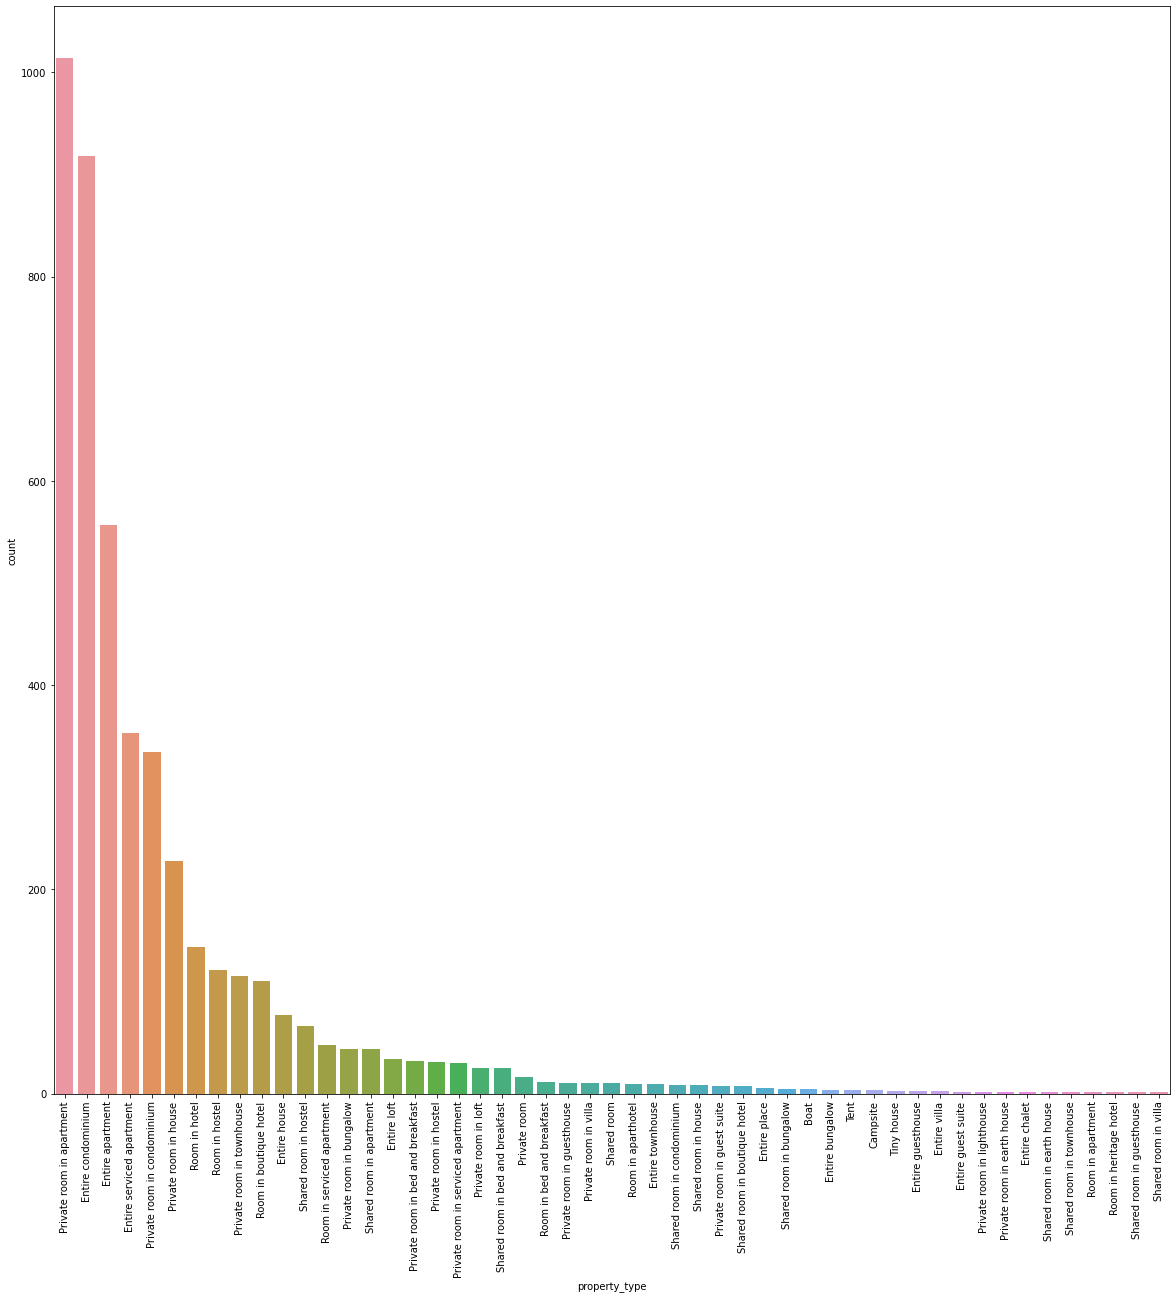

In [33]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('property_type')], order = filtered_listing['property_type'].value_counts().index)
plt.show()

Lets look at 'room_type'..

In [34]:
filtered_listing['room_type'].value_counts()

Private room       2094
Entire home/apt    1974
Hotel room          248
Shared room         176
Name: room_type, dtype: int64

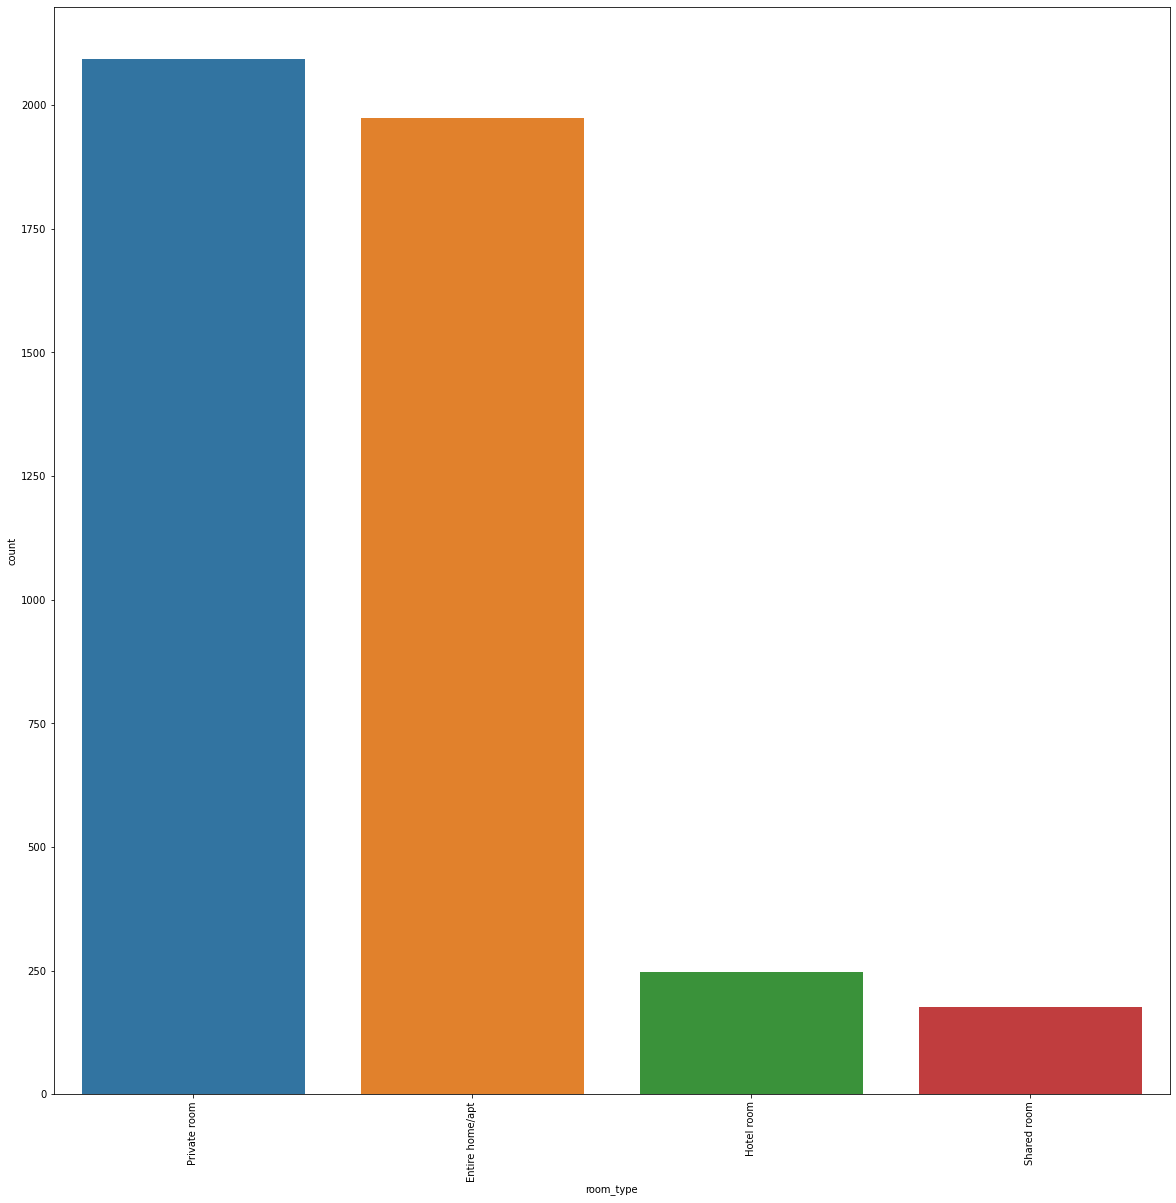

In [35]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('room_type')], order = filtered_listing['room_type'].value_counts().index)
plt.show()

In [36]:
(filtered_listing['neighbourhood_cleansed'].value_counts())/(filtered_listing['neighbourhood_cleansed'].count())

Kallang                    0.139581
Novena                     0.093277
Geylang                    0.089047
Outram                     0.077026
Rochor                     0.071460
Downtown Core              0.068121
Bukit Merah                0.047863
Bedok                      0.046972
River Valley               0.046972
Singapore River            0.032725
Queenstown                 0.026714
Tanglin                    0.018923
Orchard                    0.017364
Bukit Timah                0.016474
Toa Payoh                  0.016474
Clementi                   0.015361
Newton                     0.014470
Hougang                    0.014470
Jurong West                0.013134
Marine Parade              0.012021
Woodlands                  0.011576
Jurong East                0.011576
Tampines                   0.010463
Serangoon                  0.009350
Bishan                     0.008682
Sembawang                  0.008459
Bukit Batok                0.008014
Museum                     0

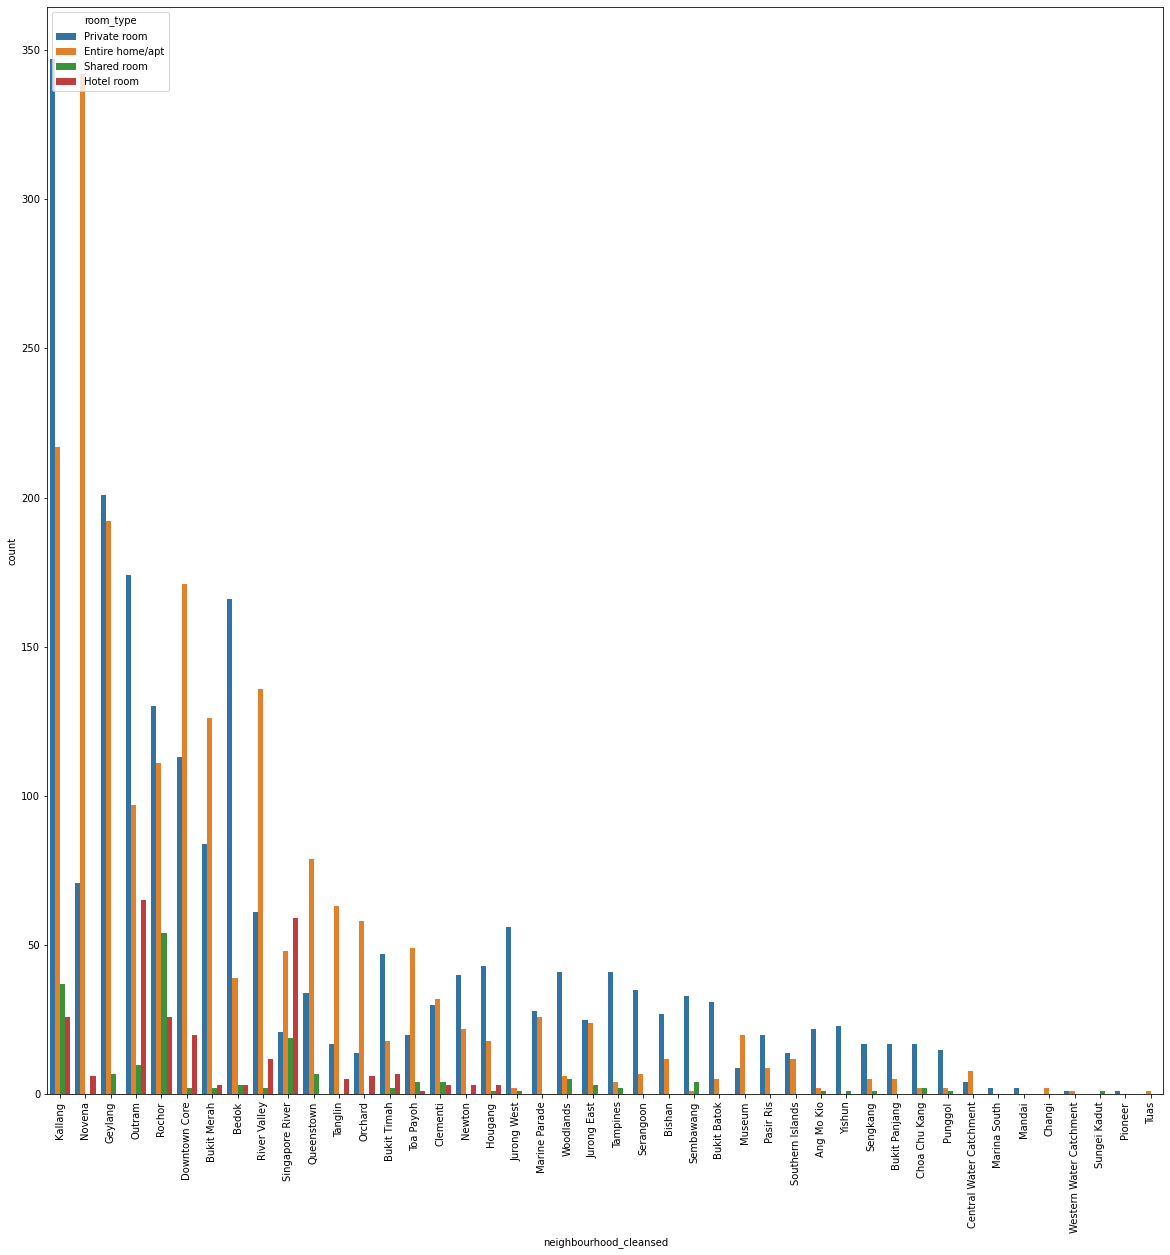

In [37]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('neighbourhood_cleansed')], hue= filtered_listing['room_type'], order = filtered_listing['neighbourhood_cleansed'].value_counts().index)
plt.show()



<AxesSubplot:xlabel='neighbourhood_cleansed'>

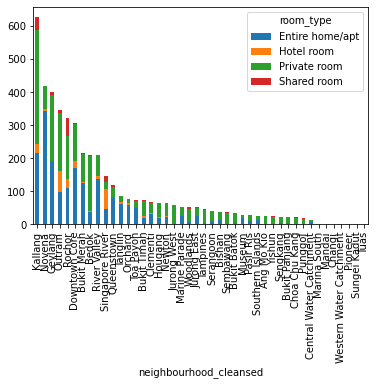

In [38]:
df_plot = filtered_listing.groupby(['room_type', 'neighbourhood_cleansed']).size().reset_index().pivot(columns='room_type', index='neighbourhood_cleansed', values=0)
df_plot = df_plot.fillna(0)

df_plot['total'] = df_plot['Private room'] + df_plot['Entire home/apt'] + df_plot['Shared room'] + df_plot['Hotel room']
df_plot = df_plot.sort_values(by=['total'], ascending = False).drop(['total'], axis=1)
df_plot.plot(kind='bar', stacked=True)
#df_plot

In [39]:
neighbourhood_count = filtered_listing.groupby('neighbourhood_cleansed').property_type.count().sort_values(ascending=False).reset_index()
neighbourhood_count

,neighbourhood_cleansed,property_type
0,Kallang,627
1,Novena,419
2,Geylang,400
3,Outram,346
4,Rochor,321
5,Downtown Core,306
6,Bukit Merah,215
7,Bedok,211
8,River Valley,211
9,Singapore River,147


The following plot also indicate where these listings are concentrated. 

In [40]:

#Creates a map of Hong Kong.
m = folium.Map(location=[22.34, 114.1], zoom_start = 11)
m.save('index.html')


#Takes the latitude and longitude coordinates and zips them into a form to be plotted.
lat = pd.to_numeric(filtered_listing['latitude'], errors = 'coerce')
lon = pd.to_numeric(filtered_listing['longitude'], errors = 'coerce')

#Zip togethers each list of latitude and longitude coordinates. 
lat_lon = list(zip(lat,lon))


mc = MarkerCluster().add_to(m)
for i in range(0,len(filtered_listing)):
    folium.Marker(location=lat_lon[i]).add_to(mc)

m.save('index.html')
display(m)


array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'latitude'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

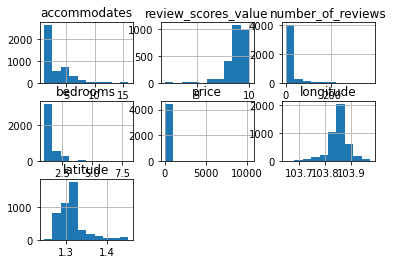

In [41]:
filtered_listing.hist()

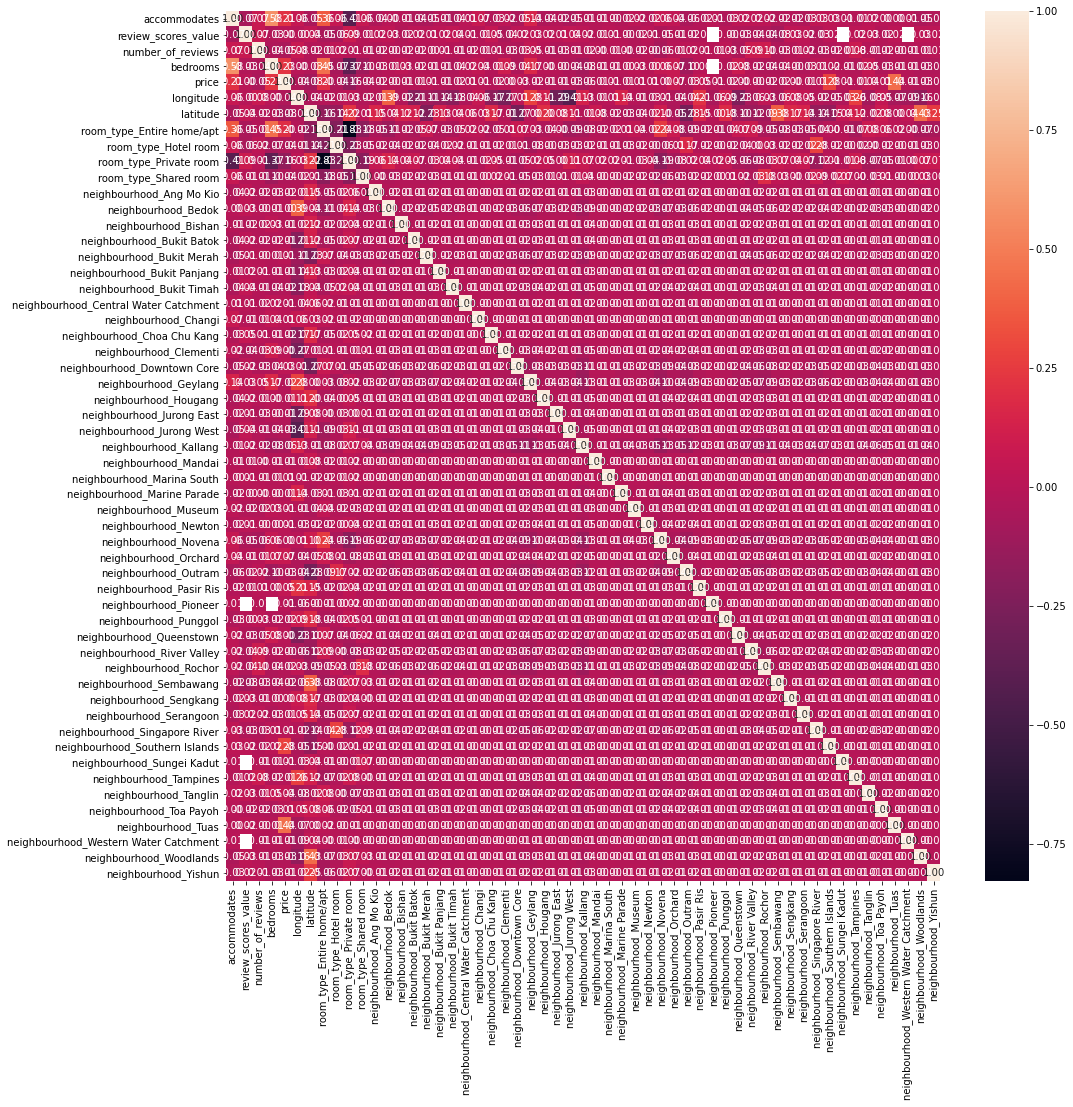

In [42]:
filtered_listing2 = pd.get_dummies(filtered_listing, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])

plt.figure(figsize = (16,16))
sns.heatmap(filtered_listing2.corr(), annot=True, fmt=".2f");

In [43]:
test = filtered_listing.dropna()

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 4421
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           2384 non-null   object 
 1   room_type               2384 non-null   object 
 2   accommodates            2384 non-null   int64  
 3   neighbourhood_cleansed  2384 non-null   object 
 4   review_scores_value     2384 non-null   float64
 5   number_of_reviews       2384 non-null   int64  
 6   bedrooms                2384 non-null   float64
 7   price                   2384 non-null   float64
 8   longitude               2384 non-null   float64
 9   latitude                2384 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 204.9+ KB


In [44]:
#Split into explanatory and response variables

X = test.drop(['price','property_type','room_type', 'neighbourhood_cleansed'], axis=1)
y = test['price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))


Linear Regression r2 score => train: 0.071, test: 0.010


In [45]:
filtered_listing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   property_type                          4492 non-null   object 
 1   accommodates                           4492 non-null   int64  
 2   review_scores_value                    2625 non-null   float64
 3   number_of_reviews                      4492 non-null   int64  
 4   bedrooms                               4106 non-null   float64
 5   price                                  4492 non-null   float64
 6   longitude                              4492 non-null   float64
 7   latitude                               4492 non-null   float64
 8   room_type_Entire home/apt              4492 non-null   uint8  
 9   room_type_Hotel room                   4492 non-null   uint8  
 10  room_type_Private room                 4492 non-null   uint8  
 11  room

In [46]:
filtered_listing2['review_scores_value'] = filtered_listing2['review_scores_value'].fillna(0)
filtered_listing2['bedrooms'] = filtered_listing2['bedrooms'].fillna(0)

filtered_listing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   property_type                          4492 non-null   object 
 1   accommodates                           4492 non-null   int64  
 2   review_scores_value                    4492 non-null   float64
 3   number_of_reviews                      4492 non-null   int64  
 4   bedrooms                               4492 non-null   float64
 5   price                                  4492 non-null   float64
 6   longitude                              4492 non-null   float64
 7   latitude                               4492 non-null   float64
 8   room_type_Entire home/apt              4492 non-null   uint8  
 9   room_type_Hotel room                   4492 non-null   uint8  
 10  room_type_Private room                 4492 non-null   uint8  
 11  room

In [47]:
#Split into explanatory and response variables

X = filtered_listing2.drop(['price','property_type'], axis=1)
y = filtered_listing2['price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))


Linear Regression r2 score => train: 0.384, test: 0.245


trying more variables....

In [57]:
filtered_listing_long = detail_listing[['price',
'bedrooms',
'host_is_superhost',
'host_listings_count',
'host_total_listings_count',
'neighbourhood_cleansed',
'latitude',
'longitude',
'room_type',
'accommodates',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'instant_bookable',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms',
'reviews_per_month'
                                       ]].copy()



#convert prices into numbers
filtered_listing_long['price'] = pd.to_numeric(filtered_listing_long['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

filtered_listing_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   price                                         4492 non-null   float64
 1   bedrooms                                      4106 non-null   float64
 2   host_is_superhost                             4490 non-null   object 
 3   host_listings_count                           4490 non-null   float64
 4   host_total_listings_count                     4490 non-null   float64
 5   neighbourhood_cleansed                        4492 non-null   object 
 6   latitude                                      4492 non-null   float64
 7   longitude                                     4492 non-null   float64
 8   room_type                                     4492 non-null   object 
 9   accommodates                                  4492 non-null   i

In [58]:
#filtered_listing_long = filtered_listing_long.dropna()
filtered_listing_long['host_is_superhost'] = filtered_listing_long['host_is_superhost'].fillna('f')
filtered_listing_long = filtered_listing_long.fillna(0)

#convert available into boolean
filtered_listing_long['host_is_superhost'] = filtered_listing_long['host_is_superhost'].map(d)
filtered_listing_long['instant_bookable'] = filtered_listing_long['instant_bookable'].map(d)
filtered_listing_long = pd.get_dummies(filtered_listing_long, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])


filtered_listing_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   price                                         4492 non-null   float64
 1   bedrooms                                      4492 non-null   float64
 2   host_is_superhost                             4492 non-null   bool   
 3   host_listings_count                           4492 non-null   float64
 4   host_total_listings_count                     4492 non-null   float64
 5   latitude                                      4492 non-null   float64
 6   longitude                                     4492 non-null   float64
 7   accommodates                                  4492 non-null   int64  
 8   number_of_reviews                             4492 non-null   int64  
 9   number_of_reviews_ltm                         4492 non-null   i

In [59]:
#Split into explanatory and response variables

X = filtered_listing_long.drop(['price'], axis=1)
y = filtered_listing_long['price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))

Linear Regression r2 score => train: 0.396, test: 0.244


In [60]:
coeff_pd = pd.DataFrame(lm_model.coef_,X_train.columns,columns=['Coefficient'])
coeff_pd

,Coefficient
bedrooms,5.787701e+01
host_is_superhost,-4.656454e+01
host_listings_count,1.736422e+11
host_total_listings_count,-1.736422e+11
latitude,-5.052125e+02
...,...
neighbourhood_Toa Payoh,3.379310e+14
neighbourhood_Tuas,3.379310e+14
neighbourhood_Western Water Catchment,3.379310e+14
neighbourhood_Woodlands,3.379310e+14


In [61]:
#I will train Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 15891.444, test: 76765.005
Random Forest R^2 train: 0.880, test: 0.106
